階層型クラスタリングのシミュレーション
下記手法を実装
- 凝集型クラスタリング
    - 単連結型
    - 群平均型
    - 完全連結型
    - ウォード法
- 分割型クラスタリング
    - Macnaughton Smith(1965)の手法

# 前準備

## import

In [1]:
# 必要なライブラリーのインストール
import numpy as np
import pandas as pd

# 可視化
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set_style('whitegrid')

# 正規化のためのクラス
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

## データ取得

In [2]:
import urllib

In [3]:
#import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/SchoolScore.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'SchoolScore.txt')

('SchoolScore.txt', <http.client.HTTPMessage at 0x224ffcd4af0>)

In [4]:
df = pd.read_csv("SchoolScore.txt", sep='\t', na_values=".", index_col=["Student"]) # データの読み込み

In [5]:
# 確認
display(df.head(5))
print(df.shape)

,Japanese,Math,English
Student,,,
0,80,85,100
1,96,100,100
2,54,83,98
3,80,98,98
4,90,92,91


(37, 3)


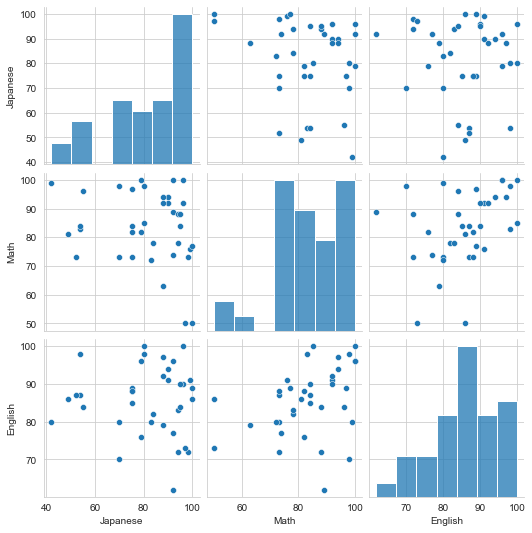

In [6]:
pg = sns.pairplot(df)

# 凝集型クラスタリング

## 単連結型

In [7]:
Z_single = linkage(df, method="single")

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [5.0, 5.0, 24.375, 24.375],
  [85.0, 85.0, 95.0, 95.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [235.0, 235.0, 253.75, 253.75],
  [220.0, 220.0, 244.375, 244.375],
  [285.0, 285.0, 295.0, 295.0],
  [232.1875, 232.1875, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [261.09375, 261.09375, 321.25, 321.25],
  [192.5, 192.5, 291.171875, 291.171875],
  [162.5, 162.5, 241.8359375, 241.8359375],
  [123.75, 123.75, 202.16796875, 202.16796875],
  [105.0, 105.0, 162.9

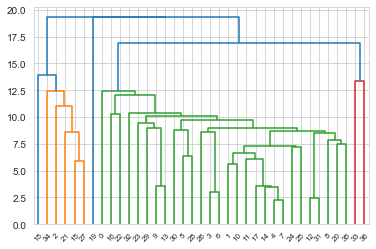

In [8]:
dendrogram(Z_single, labels=df.index)

## 群平均型

In [9]:
Z_ave = linkage(df, method="average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [63.75, 63.75, 100.0, 100.0],
  [32.5, 32.5, 81.875, 81.875],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [57.1875, 57.1875, 123.75, 123.75],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [182.5, 182.5, 220.0, 220.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [245.0, 245.0, 271.25, 271.25],
  [201.25, 201.25, 258.125, 258.125],
  [160.0, 160.0, 229.6875, 229.6875],
  [90.46875, 90.46875, 194.84375, 194.84375],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 

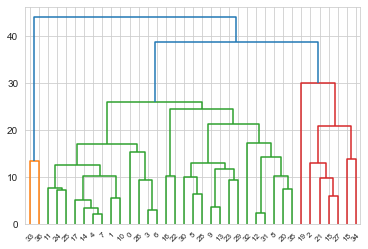

In [10]:
dendrogram(Z_ave, labels=df.index)

## 完全連結型

In [11]:
Z_com = linkage(df, method="complete")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [140.0, 140.0, 170.0, 170.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [155.0, 155.0, 203.75, 203.75],
  [101.25, 101.25, 179.375, 179.375],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [272.5, 272.5, 310.0, 310.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [291.25, 291.25, 3

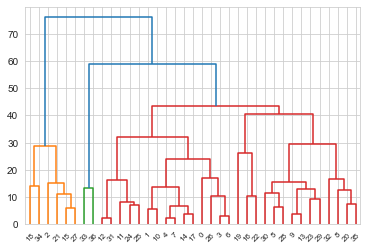

In [12]:
dendrogram(Z_com, labels=df.index)

## ウォード法

In [13]:
Z_ward = linkage(df, method="ward")

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [95.0, 95.0, 143.75, 143.75],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [202.5, 202.5, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [315.0, 315.0, 325.0, 325.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [320.0, 320.0, 343.75, 343.75],
  [281.25, 281.25, 331.875, 

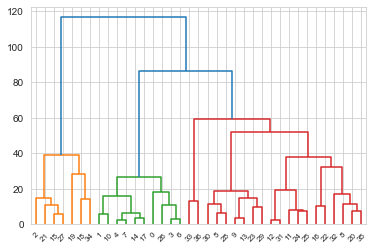

In [14]:
dendrogram(Z_ward, labels=df.index)

## 評価

### コンパクト性の評価
【評価方法】
横軸：併合の回数×縦軸：各クラスタの最大半径の最大値
完全連結型は単連結型よりもコンパクトになりやすい。そのため、折れ線グラフを描いたときに、完全連結型の線は単連結型の線よりも下に来ると考えられる

In [15]:
# クラスタの最大半径の平均と最大値を出す関数
def ave_max_maxd(d, Z, D):
    """
    d : float, デンドログラムの高さ
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    
    # クラスタリング結果
    cluster_result = fcluster(Z, t=d , criterion="distance")
    
    # 各クラスタ内の最大半径を計算
    d_max_list = []
    for i in range(1, max(cluster_result)+1):
        cluster_i = np.where(cluster_result == i)
        d_max = D[np.ix_(cluster_i[0], cluster_i[0])].max()
        d_max_list.append(d_max)
        
    # クラスタの最大半径の平均を返す
    return [np.mean(d_max_list), np.max(d_max_list)]

In [16]:
# 最大半径のリストを作成
def get_max_d_list(Z, D):
    """
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    d_max_mean_list = []
    d_max_max_list = []
    for z in Z:
        tmp_d = z[2]-10**(-3)
        d_max_mean, d_max_max = ave_max_maxd(d=tmp_d, Z=Z, D=D)
        d_max_mean_list.append(d_max_mean)
        d_max_max_list.append(d_max_max)
    
    return [d_max_mean_list, d_max_max_list]

In [17]:
# 距離行列の作成
df_nparray = np.array(df)
combination_df = df_nparray-df_nparray[:, np.newaxis]
d_matrix = np.array([[np.linalg.norm(combination_df[i, j]) for i in range(0, len(df_nparray))] for j in range(0, len(df_nparray))])

# 全データの最大半径
all_data_d_max = d_matrix.max()

# 単連結
d_max_mean_list_single, d_max_max_list_single = get_max_d_list(Z=Z_single, D=d_matrix)
d_max_mean_list_single.append(all_data_d_max)

# 群平均
d_max_mean_list_ave, d_max_max_list_ave = get_max_d_list(Z=Z_ave, D=d_matrix)
d_max_mean_list_ave.append(all_data_d_max)
# 完全連結
d_max_mean_list_com, d_max_max_list_com = get_max_d_list(Z=Z_com, D=d_matrix)
d_max_mean_list_com.append(all_data_d_max)
# ウォード法
d_max_mean_list_ward, d_max_max_list_ward = get_max_d_list(Z=Z_ward, D=d_matrix)
d_max_mean_list_ward.append(all_data_d_max)

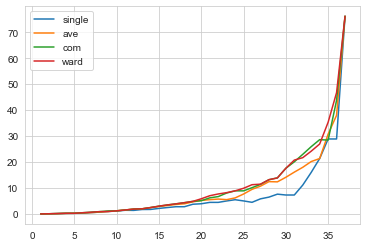

In [18]:
# 作図
## 単連結型
p1 = plt.plot(range(1, len(d_max_mean_list_single)+1), d_max_mean_list_single)
## 群平均型
p2 = plt.plot(range(1, len(d_max_mean_list_ave)+1), d_max_mean_list_ave)
## 完全連結型
p3 = plt.plot(range(1, len(d_max_mean_list_com)+1), d_max_mean_list_com)
## ウォード法
p4 = plt.plot(range(1, len(d_max_mean_list_ward)+1), d_max_mean_list_ward)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ("single", "ave", "com", "ward"))

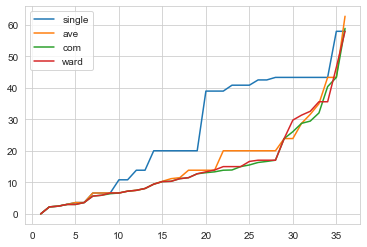

In [19]:
# 作図
## 単連結型
p1 = plt.plot(range(1, len(d_max_max_list_single)+1), d_max_max_list_single)
## 群平均型
p2 = plt.plot(range(1, len(d_max_max_list_ave)+1), d_max_max_list_ave)
## 完全連結型
p3 = plt.plot(range(1, len(d_max_max_list_com)+1), d_max_max_list_com)
## ウォード法
p4 = plt.plot(range(1, len(d_max_max_list_ward)+1), d_max_max_list_ward)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ("single", "ave", "com", "ward"))

### 近接性の評価

In [20]:
# 近接性を評価するための指標
def num_neighborhood_point(d, Z, D):
    """
    d : float, デンドログラムの高さ
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    
    # クラスタリング結果
    cluster_result = fcluster(Z, t=d , criterion="distance")
    
    # 上位epsilon以内の他クラスタの割合をリストに入れる
    other_point_num_list = []
    for i, c in enumerate(cluster_result):
        cluster_c = np.where(cluster_result == c) # iと同じクラスタのindex
        
        other_flg_list = np.ones(len(cluster_result)) 
        other_flg_list[cluster_c] = 0 # 自分と同じクラスタなら0, 異なるクラスタなら1であるフラグを作成
        
        # 自他フラグ, 距離, indexをまとめたDataFrameを作成
        tmp_df_other_d = pd.DataFrame(columns=["other_flg", "d", "index"])
        tmp_df_other_d["other_flg"] = other_flg_list
        tmp_df_other_d["d"] = D[i, :]
        tmp_df_other_d["index"] = list(tmp_df_other_d.index)
        
        # 自分との距離が小さい順に並び変える
        df_other_d = tmp_df_other_d.sort_values("d")
        
        # 上位epsilon以内の他クラスタの割合を計算
        other_point_num = np.sum(df_other_d["other_flg"][1:round(len(df_other_d)/2)])/(round(len(df_other_d)/2))
        
        other_point_num_list.append(other_point_num)
        
    return [np.mean(other_point_num_list), np.max(other_point_num_list)]

In [21]:
# 近接性評価のためのリストを作成
def get_closeness_indicator(Z, D):
    """
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    d_mean_num_neighborrhood = []
    d_max_num_neighborrhood = []
    for z in Z:
        tmp_d = z[2]-10**(-3)
        d_mean_num, d_max_num = num_neighborhood_point(d=tmp_d, Z=Z, D=D)
        d_mean_num_neighborrhood.append(d_mean_num)
        d_max_num_neighborrhood.append(d_max_num)
    
    return [d_mean_num_neighborrhood, d_max_num_neighborrhood]

In [22]:
# 単連結
d_mean_num_neighborhood_single, d_max_num_neighborhood_single = get_closeness_indicator(Z=Z_single, D=d_matrix)

# 群平均
d_mean_num_neighborhood_ave, d_max_num_neighborhood_ave = get_closeness_indicator(Z=Z_ave, D=d_matrix)

# 完全連結
d_mean_num_neighborhood_com, d_max_num_neighborhood_com = get_closeness_indicator(Z=Z_com, D=d_matrix)

# ウォード法
d_mean_num_neighborhood_ward, d_max_num_neighborhood_ward = get_closeness_indicator(Z=Z_ward, D=d_matrix)

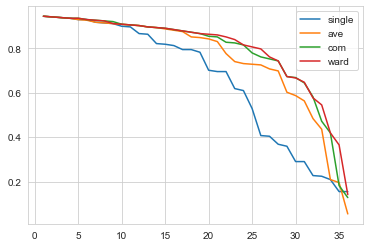

In [23]:
# 作図
## 単連結型
p1 = plt.plot(range(1, len(d_mean_num_neighborhood_single)+1), d_mean_num_neighborhood_single)
## 群平均型
p2 = plt.plot(range(1, len(d_mean_num_neighborhood_ave)+1), d_mean_num_neighborhood_ave)
## 完全連結型
p3 = plt.plot(range(1, len(d_mean_num_neighborhood_com)+1), d_mean_num_neighborhood_com)
## ウォード法
p4 = plt.plot(range(1, len(d_mean_num_neighborhood_ward)+1), d_mean_num_neighborhood_ward)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ("single", "ave", "com", "ward"))

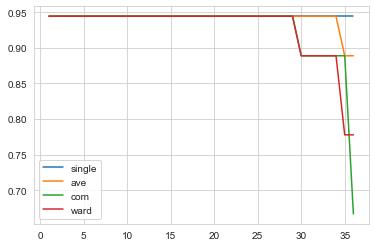

In [24]:
# 作図
## 単連結型
p1 = plt.plot(range(1, len(d_max_num_neighborhood_single)+1), d_max_num_neighborhood_single)
## 群平均型
p2 = plt.plot(range(1, len(d_max_num_neighborhood_ave)+1), d_max_num_neighborhood_ave)
## 完全連結型
p3 = plt.plot(range(1, len(d_max_num_neighborhood_com)+1), d_max_num_neighborhood_com)
## ウォード法
p4 = plt.plot(range(1, len(d_max_num_neighborhood_ward)+1), d_max_num_neighborhood_ward)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ("single", "ave", "com", "ward"))

#### 近接性の評価をしようと思って作成したがうまくいかなかった指標
下記指標は結局、最大半径に依存してしまうため、どちらかというとコンパクト性の評価になってしまった

In [25]:
# 自クラスタの一番距離が遠い点との距離-他クラスタの一番近い点との距離の最大値と平均を取得
def ave_max_diff_max_mind(d, Z, D):
    """
    d : float, デンドログラムの高さ
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    
    # クラスタリング結果
    cluster_result = fcluster(Z, t=d , criterion="distance")
    # 各クラスタ内の最大半径と他クラスタとの最小距離を取得
    d_max_list = []
    d_min_list = []
    for i, c in enumerate(cluster_result):
        cluster_c = np.where(cluster_result == c) # iと同じクラスタのindex
        d_max = D[np.ix_([i], cluster_c[0])].max() # iと同じクラスタの最大距離
        d_max_list.append(d_max) 
        
        cluster_not_c = np.where(cluster_result != c) # iと異なるクラスタのindex
        d_min = D[np.ix_([i], cluster_not_c[0])].min() # iと異なるクラスタの最小距離
        d_min_list.append(d_min)
    
    # 最大値と最小値の差分
    d_diff_list = np.array(d_max_list)-np.array(d_min_list)
    
    # pandas.DataFrameに変換
    df = pd.DataFrame(columns=["cluss_no", "diff"])
    df["cluss_no"] = cluster_result
    df["diff"] = d_diff_list
    
    # max, minを取得
    df_groupby = (
        df
        .groupby(["cluss_no"], as_index=False)
        .agg({"diff" : np.max, "diff" : np.mean})
    
    )
    
    return [np.mean(df_groupby["diff"]), np.max(df_groupby["diff"])]

# 自クラスタの他の点との平均距離-他クラスタの点との距離の平均の差分の最大値を取得
def max_diff_mean(d, Z, D):
    """
    d : float, デンドログラムの高さ
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    
    # クラスタリング結果
    cluster_result = fcluster(Z, t=d , criterion="distance")
    # 各クラスタ内の平均距離と他クラスタとの平均距離を取得
    d_self_mean_list = []
    d_other_mean_list = []
    for i, c in enumerate(cluster_result):
        cluster_c = np.where(cluster_result == c) # iと同じクラスタのindex
        d_self_mean = D[np.ix_([i], cluster_c[0])].mean() # iと同じクラスタの平均距離
        d_self_mean_list.append(d_self_mean) 
        
        cluster_not_c = np.where(cluster_result != c) # iと異なるクラスタのindex
        d_other_mean = D[np.ix_([i], cluster_not_c[0])].mean() # iと異なるクラスタの平均距離
        d_other_mean_list.append(d_other_mean)
    
    # 自クラスタの平均距離と他クラスタの平均距離の差分
    d_diff_list = np.array(d_self_mean_list)-np.array(d_other_mean_list)
    
    # pandas.DataFrameに変換
    df = pd.DataFrame(columns=["cluss_no", "diff"])
    df["cluss_no"] = cluster_result
    df["diff"] = d_diff_list
    
    # max, minを取得
    df_groupby = (
        df
        .groupby(["cluss_no"], as_index=False)
        .agg({"diff" : np.max, "diff" : np.mean})
    
    )
    
    return [np.mean(df_groupby["diff"]), np.max(df_groupby["diff"])]

In [26]:
# maxとminの差分を取得し、リスト化
# 最大半径のリストを作成
def get_diff_d_list(Z, D):
    """
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    d_diff_mean_list = []
    d_diff_max_list = []
    for z in Z:
        tmp_d = z[2]-10**(-3)
        d_mean_diff, d_max_diff = ave_max_diff_max_mind(d=tmp_d, Z=Z, D=D)
        d_diff_mean_list.append(d_mean_diff)
        d_diff_max_list.append(d_max_diff)
    
    return [d_diff_mean_list, d_diff_max_list]

def get_diff_d_list2(Z, D):
    """
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    d_diff_mean_list = []
    d_diff_max_list = []
    for z in Z:
        tmp_d = z[2]-10**(-3)
        d_mean_diff, d_max_diff = max_diff_mean(d=tmp_d, Z=Z, D=D)
        d_diff_mean_list.append(d_mean_diff)
        d_diff_max_list.append(d_max_diff)
    
    return [d_diff_mean_list, d_diff_max_list]

In [27]:
# 単連結
d_ave_diff_list_single, d_max_diff_list_single = get_diff_d_list(Z=Z_single, D=d_matrix)
d_ave_diff_list_single2, d_max_diff_list_single2 = get_diff_d_list2(Z=Z_single, D=d_matrix)

# 群平均
d_ave_diff_list_ave, d_max_diff_list_ave = get_diff_d_list(Z=Z_ave, D=d_matrix)
d_ave_diff_list_ave2, d_max_diff_list_ave2 = get_diff_d_list2(Z=Z_ave, D=d_matrix)

# 完全連結
d_ave_diff_list_com, d_max_diff_list_com = get_diff_d_list(Z=Z_com, D=d_matrix)
d_ave_diff_list_com2, d_max_diff_list_com2 = get_diff_d_list2(Z=Z_com, D=d_matrix)

# ウォード法
d_ave_diff_list_ward, d_max_diff_list_ward = get_diff_d_list(Z=Z_ward, D=d_matrix)
d_ave_diff_list_ward2, d_max_diff_list_ward2 = get_diff_d_list2(Z=Z_ward, D=d_matrix)

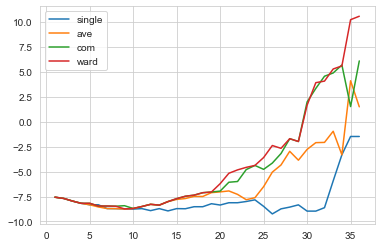

In [28]:
# 作図
## 単連結型
p1 = plt.plot(range(1, len(d_ave_diff_list_single)+1), d_ave_diff_list_single)
## 群平均型
p2 = plt.plot(range(1, len(d_ave_diff_list_ave)+1), d_ave_diff_list_ave)
## 完全連結型
p3 = plt.plot(range(1, len(d_ave_diff_list_com)+1), d_ave_diff_list_com)
## ウォード法
p4 = plt.plot(range(1, len(d_ave_diff_list_ward)+1), d_ave_diff_list_ward)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ("single", "ave", "com", "ward"))

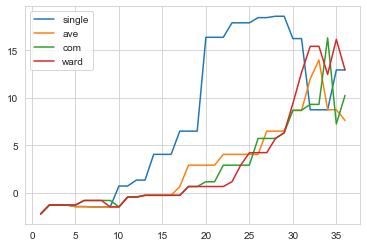

In [29]:
# 作図
## 単連結型
p1 = plt.plot(range(1, len(d_max_diff_list_single)+1), d_max_diff_list_single)
## 群平均型
p2 = plt.plot(range(1, len(d_max_diff_list_ave)+1), d_max_diff_list_ave)
## 完全連結型
p3 = plt.plot(range(1, len(d_max_diff_list_com)+1), d_max_diff_list_com)
## ウォード法
p4 = plt.plot(range(1, len(d_max_diff_list_ward)+1), d_max_diff_list_ward)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ("single", "ave", "com", "ward"))

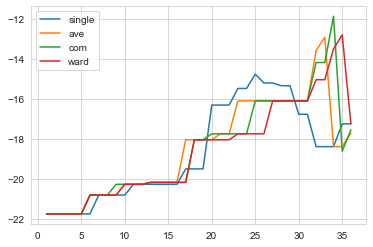

In [30]:
# 作図
## 単連結型
p1 = plt.plot(range(1, len(d_max_diff_list_single2)+1), d_max_diff_list_single2)
## 群平均型
p2 = plt.plot(range(1, len(d_max_diff_list_ave2)+1), d_max_diff_list_ave2)
## 完全連結型
p3 = plt.plot(range(1, len(d_max_diff_list_com2)+1), d_max_diff_list_com2)
## ウォード法
p4 = plt.plot(range(1, len(d_max_diff_list_ward2)+1), d_max_diff_list_ward2)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ("single", "ave", "com", "ward"))

## おまけ
scipy.cluster.hierarchyのdendrogram関数によって書かれるdendrogramの縦軸が、クラスタリングをする際の基準値になっている。そのため、手法間の比較をしにくい。ここでは、各郡の重心間の距離でdendrogramを書き直し、適切な比較をできるようにする。

In [31]:
# 各群の重心を求める関数
def get_cg_point(data):
    return(data.mean(axis=0))

In [32]:
# linkageの出力のZ-arrayに載っているクラスタを元のクラスタ番号に戻す関数
def z2index(Z, r, E_in, n): 
    """
    Z:linkageの出力
    r：Z内のクラスタ番号。元に戻したいクラスタ
    E_in:ｒより小さいインデックスのクラスタ
    n:クラスタ分析するデータのサンプルサイズ
    """
    
    # rを構成するクラスタを取り出す
    i = r-n
    cluss1,cluss2 = Z[i, 0:2] # cluss1, cluss2がrを構成するクラスタ
    
    # E_inから元のクラスタを取り出し、rのクラスタとする
    cluss1_indexes = np.array(E_in[int(cluss1)])
    cluss2_indexes = np.array(E_in[int(cluss2)])
    new_list = np.concatenate([cluss1_indexes, cluss2_indexes]).flatten().tolist()
    E_in.append(new_list)  # E_inはクラスタ番号が小さい順に作っていくことが前提
    
    return E_in

In [33]:
# linkageの出力であるZ-arrayの距離が何を表しているか考える
## 併合に使う距離である説（つまり、各クラスタ間の距離のmin）
# クラスタ番号と要素の組み合わせを表すリストの初期化
E_ele_list = range(0, len(df))
E = [[e] for e in E_ele_list]

for r in range(len(df), int(Z_single[:, 0:2].max()+1)):
    E = z2index(
            Z = Z_single,
            r = r, 
            E_in = E,
            n = len(df)
        )

In [34]:
# 2つのクラスタの中でデータ間の最短距離をいくつか抽出してみる
# [49.        , 52.        ,  8.66025404, 14.        ]
# クラスタ番号49, 52に含まれるデータの最短距離
print("最短距離", d_matrix[np.ix_(E[49], E[52])].min())
# クラスタ番号49, 52に含まれる重心間の距離
g1 = get_cg_point(df.iloc[E[49]])
g2 = get_cg_point(df.iloc[E[52]])
g1g2_dis = np.sqrt(np.sum((g1-g2)**2))
print("重心間の距離", g1g2_dis)
# →やはり、各クラスタ間の最短距離だった

最短距離 8.660254037844387
重心間の距離 20.578509706205526


In [35]:
# クラスタの重心間の距離でデンドログラムを書き直す
tmp_Z_single_2 = np.empty((1, 4))

# 冪等性保証のための処理
tmp_Z = Z_single.copy()

for z in tmp_Z:
    # 1個目のクラスタに含まれる要素
    clusetr1_ele = E[int(z[0])]
    # 1個目のクラスタの重心
    g1 = get_cg_point(df.iloc[clusetr1_ele])
    
    # 2個目のクラスタに含まれる要素
    clusetr2_ele = E[int(z[1])]
    # 2個目のクラスタの重心
    g2 = get_cg_point(df.iloc[clusetr2_ele])
    
    # 重心間の距離を計算
    g1g2_dis = np.sqrt(np.sum((g1-g2)**2))
    
    # zの距離を重心間の距離に置き換える
    z[2] = g1g2_dis
    
    tmp_Z_single_2 = np.vstack((tmp_Z_single_2, z))
    
Z_single_2 = tmp_Z_single_2[1:len(tmp_Z_single_2)]

In [36]:
Z_single_2

array([[ 4.        ,  7.        ,  2.23606798,  2.        ],
       [12.        , 31.        ,  2.44948974,  2.        ],
       [ 3.        ,  6.        ,  3.        ,  2.        ],
       [14.        , 37.        ,  3.35410197,  3.        ],
       [17.        , 40.        ,  5.03322296,  4.        ],
       [ 9.        , 13.        ,  3.60555128,  2.        ],
       [ 1.        , 10.        ,  5.65685425,  2.        ],
       [15.        , 27.        ,  5.91607978,  2.        ],
       [11.        , 41.        ,  7.88986692,  5.        ],
       [ 5.        , 28.        ,  6.40312424,  2.        ],
       [43.        , 45.        ,  9.58331884,  7.        ],
       [24.        , 25.        ,  7.21110255,  2.        ],
       [47.        , 48.        , 12.01189886,  9.        ],
       [20.        , 35.        ,  7.48331477,  2.        ],
       [ 8.        , 50.        ,  9.89949494,  3.        ],
       [38.        , 51.        , 13.64021831,  5.        ],
       [26.        , 39.

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [5.0, 5.0, 24.375, 24.375],
  [85.0, 85.0, 95.0, 95.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [235.0, 235.0, 253.75, 253.75],
  [220.0, 220.0, 244.375, 244.375],
  [285.0, 285.0, 295.0, 295.0],
  [232.1875, 232.1875, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [261.09375, 261.09375, 321.25, 321.25],
  [192.5, 192.5, 291.171875, 291.171875],
  [162.5, 162.5, 241.8359375, 241.8359375],
  [123.75, 123.75, 202.16796875, 202.16796875],
  [105.0, 105.0, 162.9

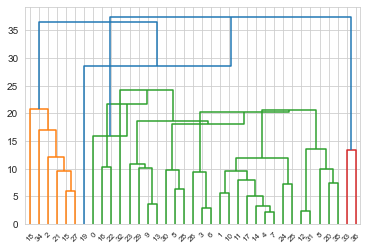

In [37]:
dendrogram(Z_single_2, labels=df.index)